In [2]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load the dataset

In [5]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data")
#df=pd.read_csv("parkinsons_data.csv")

In [6]:
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)


# Checking the Data for Null Values

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Checking the Variance of the data set

In [8]:
df.var()

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

# Checking the size and shape of the data set

In [9]:
df.shape

(195, 24)

# Checking the data mean/Std etc

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# Checking the Data Types of the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

# As the Name column will not impact the outcome of Dependent variable we can directly drop the same

In [12]:
df.drop(columns='name')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


# Checking the Correlation using the Corr() function and the Heatmap

In [13]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

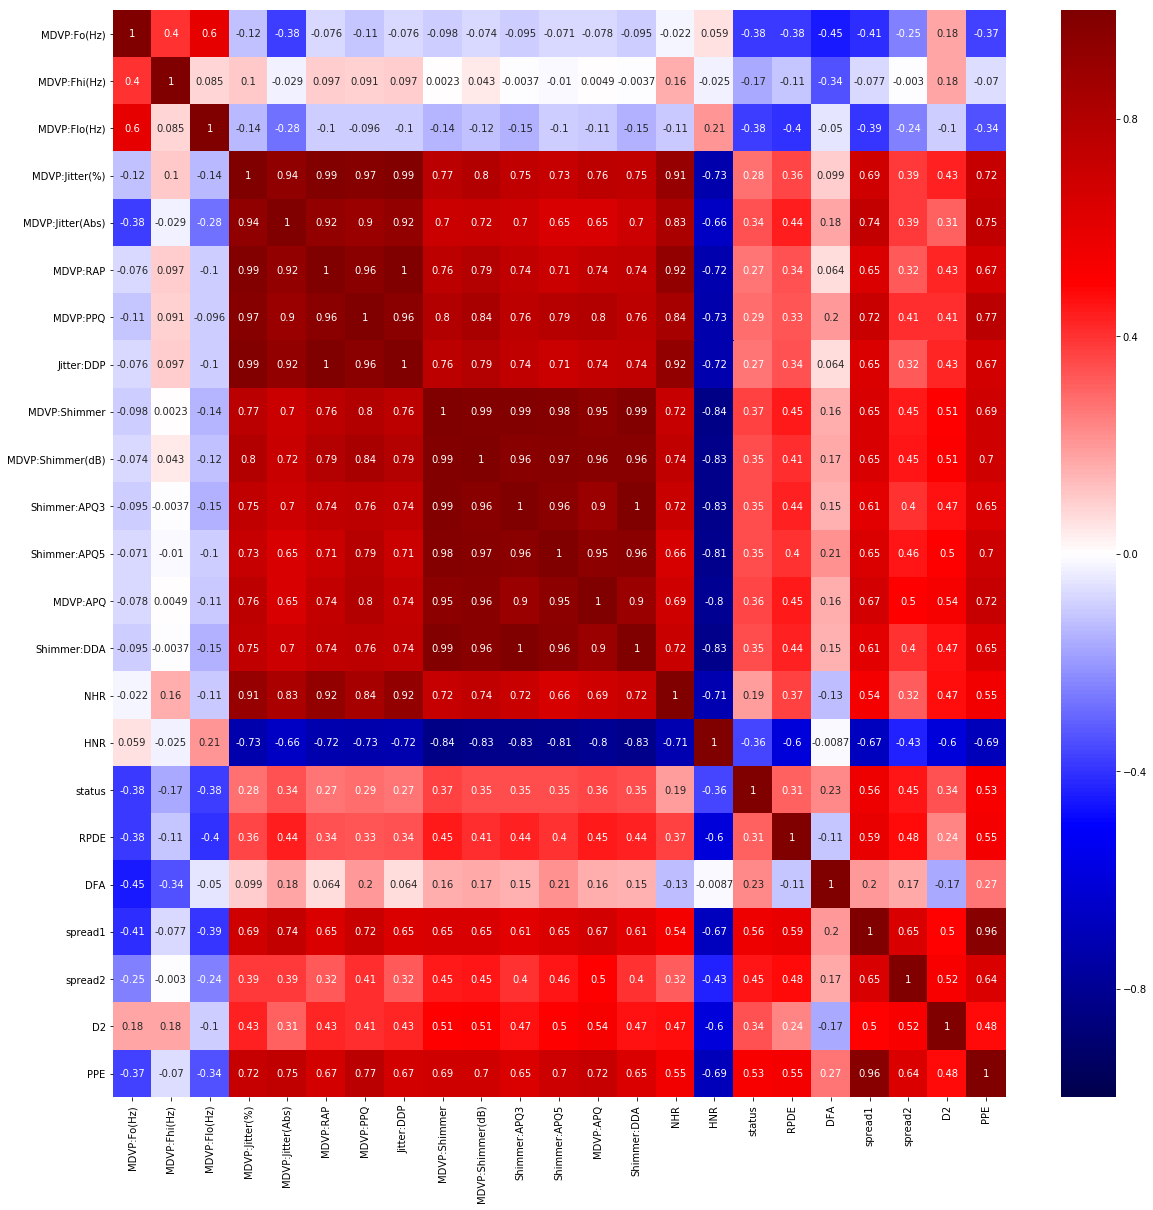

In [15]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


 
As there is very high correlation between
MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - 
are all measures of variation in fundamental frequency and all of them represent fundamental frequency we will only use one of the variables 'MDVP:Fo(Hz)' to try to improve the model

Similarly only using Shimmer:DDA to represent variation in amplitute- as all variables represent measures of variation in amplitude


In [17]:
#df_new=df[['MDVP:Fo(Hz)','Jitter:DDP','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']]
df_new=df[['MDVP:Fo(Hz)','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']]

df_new

,MDVP:Fo(Hz),Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,120.552,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,120.267,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,107.332,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,95.730,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,95.056,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


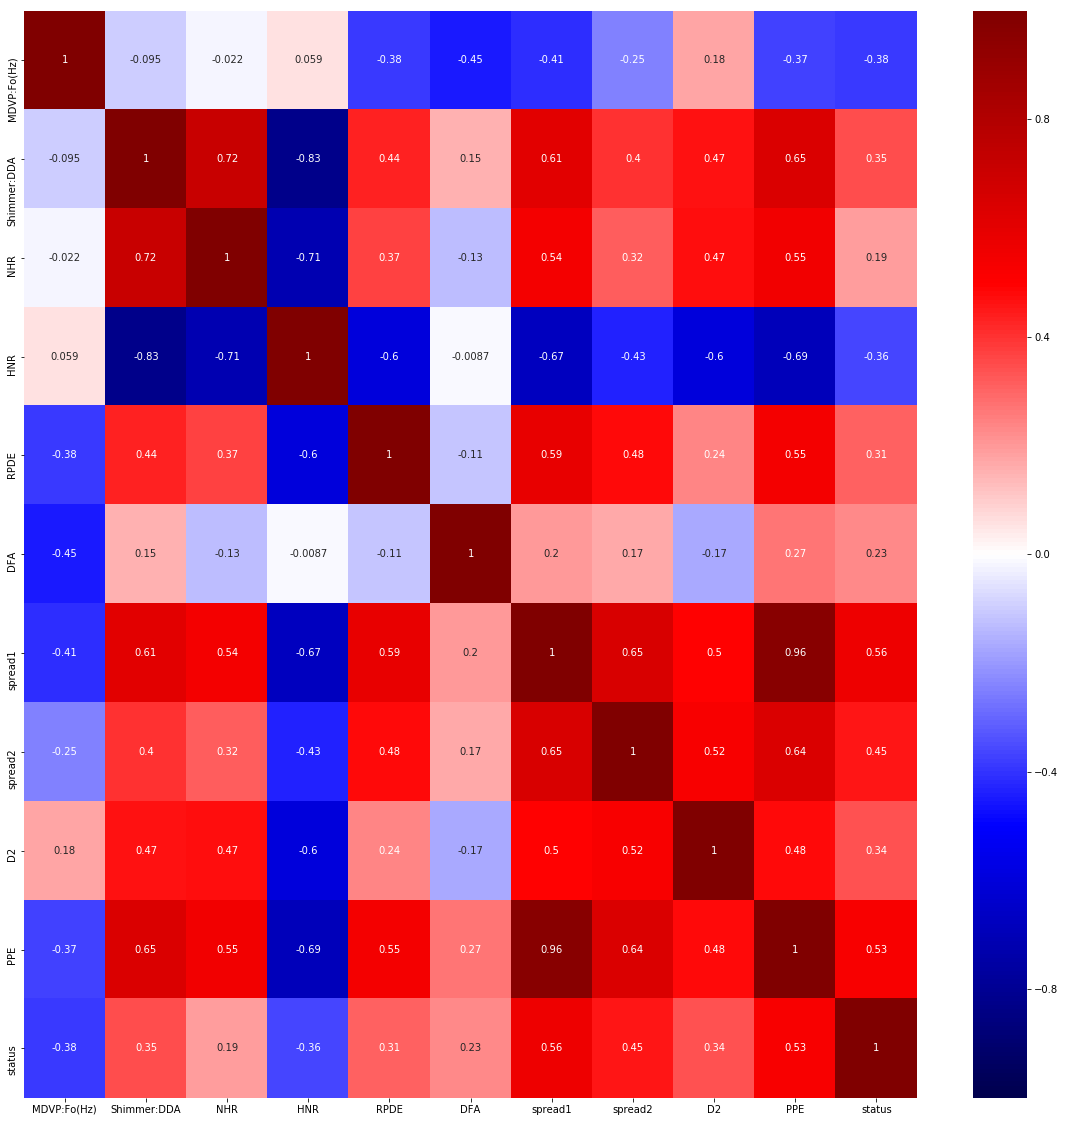

In [18]:
plt.subplots(figsize=(20,20))
sns.heatmap(df_new.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


In [19]:
df.groupby(["status"]).count()
# Most have PD. The ratio is almost 1:3 in favor or status 1.  The model's ability to predict class 1 will 
# be better than predicting  0. 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


# 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [23]:
df_new.columns

Index(['MDVP:Fo(Hz)', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

# Univariate Anaysis using Distplot

Data in Shimmer:DDA has seems to have frequencies between 100 to 250, highest being around 125, data is Right skewed and so we can use Log transformation for normalizing the data if needed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


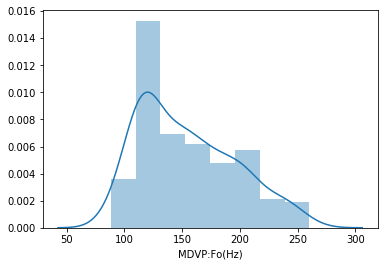

In [58]:
x1=df_new['MDVP:Fo(Hz)']
x2=df_new['Shimmer:DDA']
x3=df_new.NHR
x4=df_new.HNR
x5=df_new.RPDE
x6=df_new.DFA
x7=df_new.spread1
x8=df_new.spread2
x9=df_new.D2
x10=df_new.PPE
sns.distplot(x1);
print('Data in Shimmer:DDA has seems to have frequencies between 100 to 250, highest being around 125, data is Right skewed and so we can use Log transformation for normalizing the data if needed')

Data in DDA has seems to have higher frequencies between 0.00 to 0.05, data is Right skewed and so we can use Log transformation for normalizing the data


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


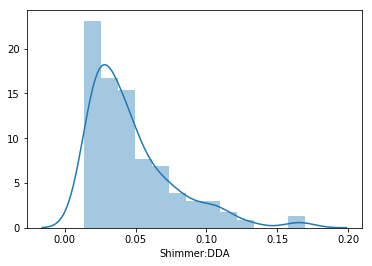

In [55]:
sns.distplot(x2);
print('Data in Shimmer:DDA has seems to have higher frequencies between 0.01 to 0.04, data is Right skewed and so we can use Log transformation for normalizing the data')

C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Data in NHR has seems to have higher frequencies between 0.00 to 0.05, data is Right skewed and so we can use Log transformation for normalizing the data


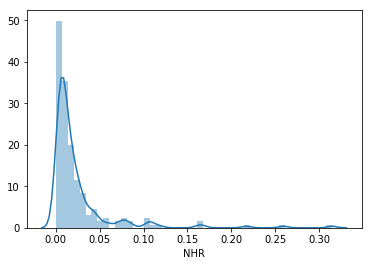

In [56]:
sns.distplot(x3);
print('Data in NHR has seems to have higher frequencies between 0.00 to 0.05, data is Right skewed and so we can use Log transformation for normalizing the data')

Data in HNR has higher frequencies between 18 to 28, data seems to be slightly left Skewed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


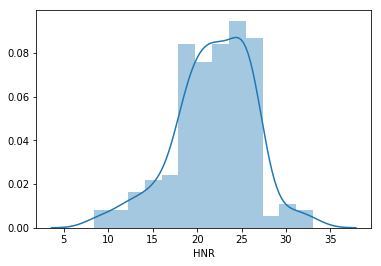

In [59]:
sns.distplot(x4);
print('Data in HNR has higher frequencies between 18 to 28, data seems to be slightly left Skewed')

Data in RPDE has higher frequencies between 0.4 to 0.7, highest around 0.45, data seems to be normally distributed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


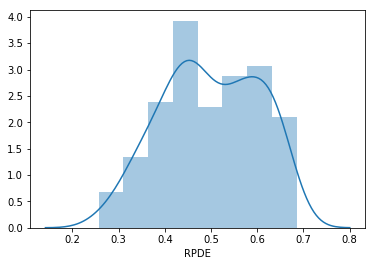

In [60]:
sns.distplot(x5);
print('Data in RPDE has higher frequencies between 0.4 to 0.7, highest around 0.45, data seems to be normally distributed')

Data in DFA has higher frequencies between 0.65 to 0.8, highest being between 0.7 to 0.75, data seems to be normally distributed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


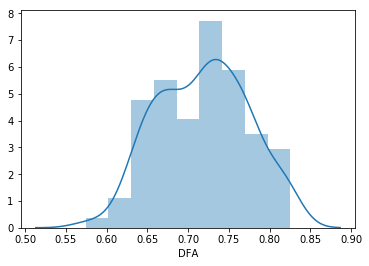

In [61]:
sns.distplot(x6);
print('Data in DFA has higher frequencies between 0.65 to 0.8, highest being between 0.7 to 0.75, data seems to be normally distributed')

Data in Spread2 has higher frequencies between -7 to -4, highest being at -5, data seems to be normally distributed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


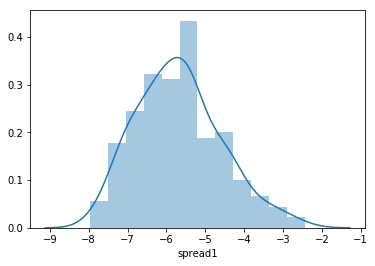

In [62]:
sns.distplot(x7);
print('Data in Spread2 has higher frequencies between -7 to -4, highest being at -5, data seems to be normally distributed')

Data in Spread2 has higher frequencies between 0.1 to 0.35, highest being at 0.2, data seems to be normally distributed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


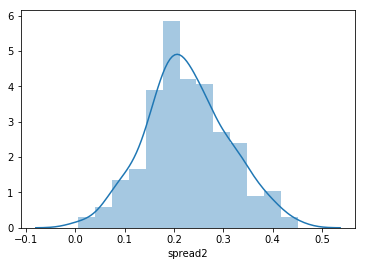

In [63]:
sns.distplot(x8);
print('Data in Spread2 has higher frequencies between 0.1 to 0.35, highest being at 0.2, data seems to be normally distributed')

Data in D2 has higher frequencies between 1.5 to 3.5, highest being at 2.5 ,data seems to be normally distributed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


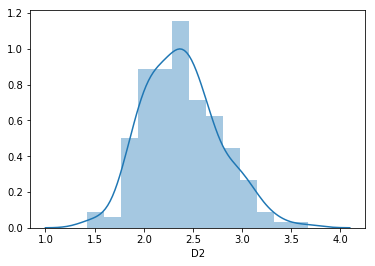

In [64]:
sns.distplot(x9);
print('Data in D2 has higher frequencies between 1.5 to 3.5, highest being at 2.5 ,data seems to be normally distributed')

Data in PPE has higher frequencies between PPE 0.1 to 0.4,  highest being at 0.2,data seems to be slightly right skewed


C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


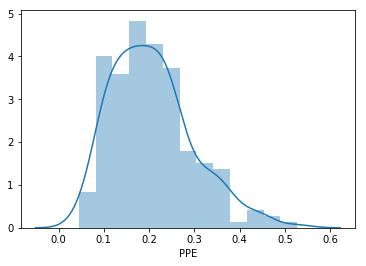

In [65]:
sns.distplot(x10);
print('Data in PPE has higher frequencies between PPE 0.1 to 0.4,  highest being at 0.2,data seems to be slightly right skewed')

# For Data that is right skewed Mean lies towards the tail (Right), Mode Lies towards the higher concentration values(towards the left)

# For Data that is Left skewed Mean lies towards the tail (Left), Mode Lies towards the higher concentration values(towards the Right)

# Bivariate Analysis using PairPlot

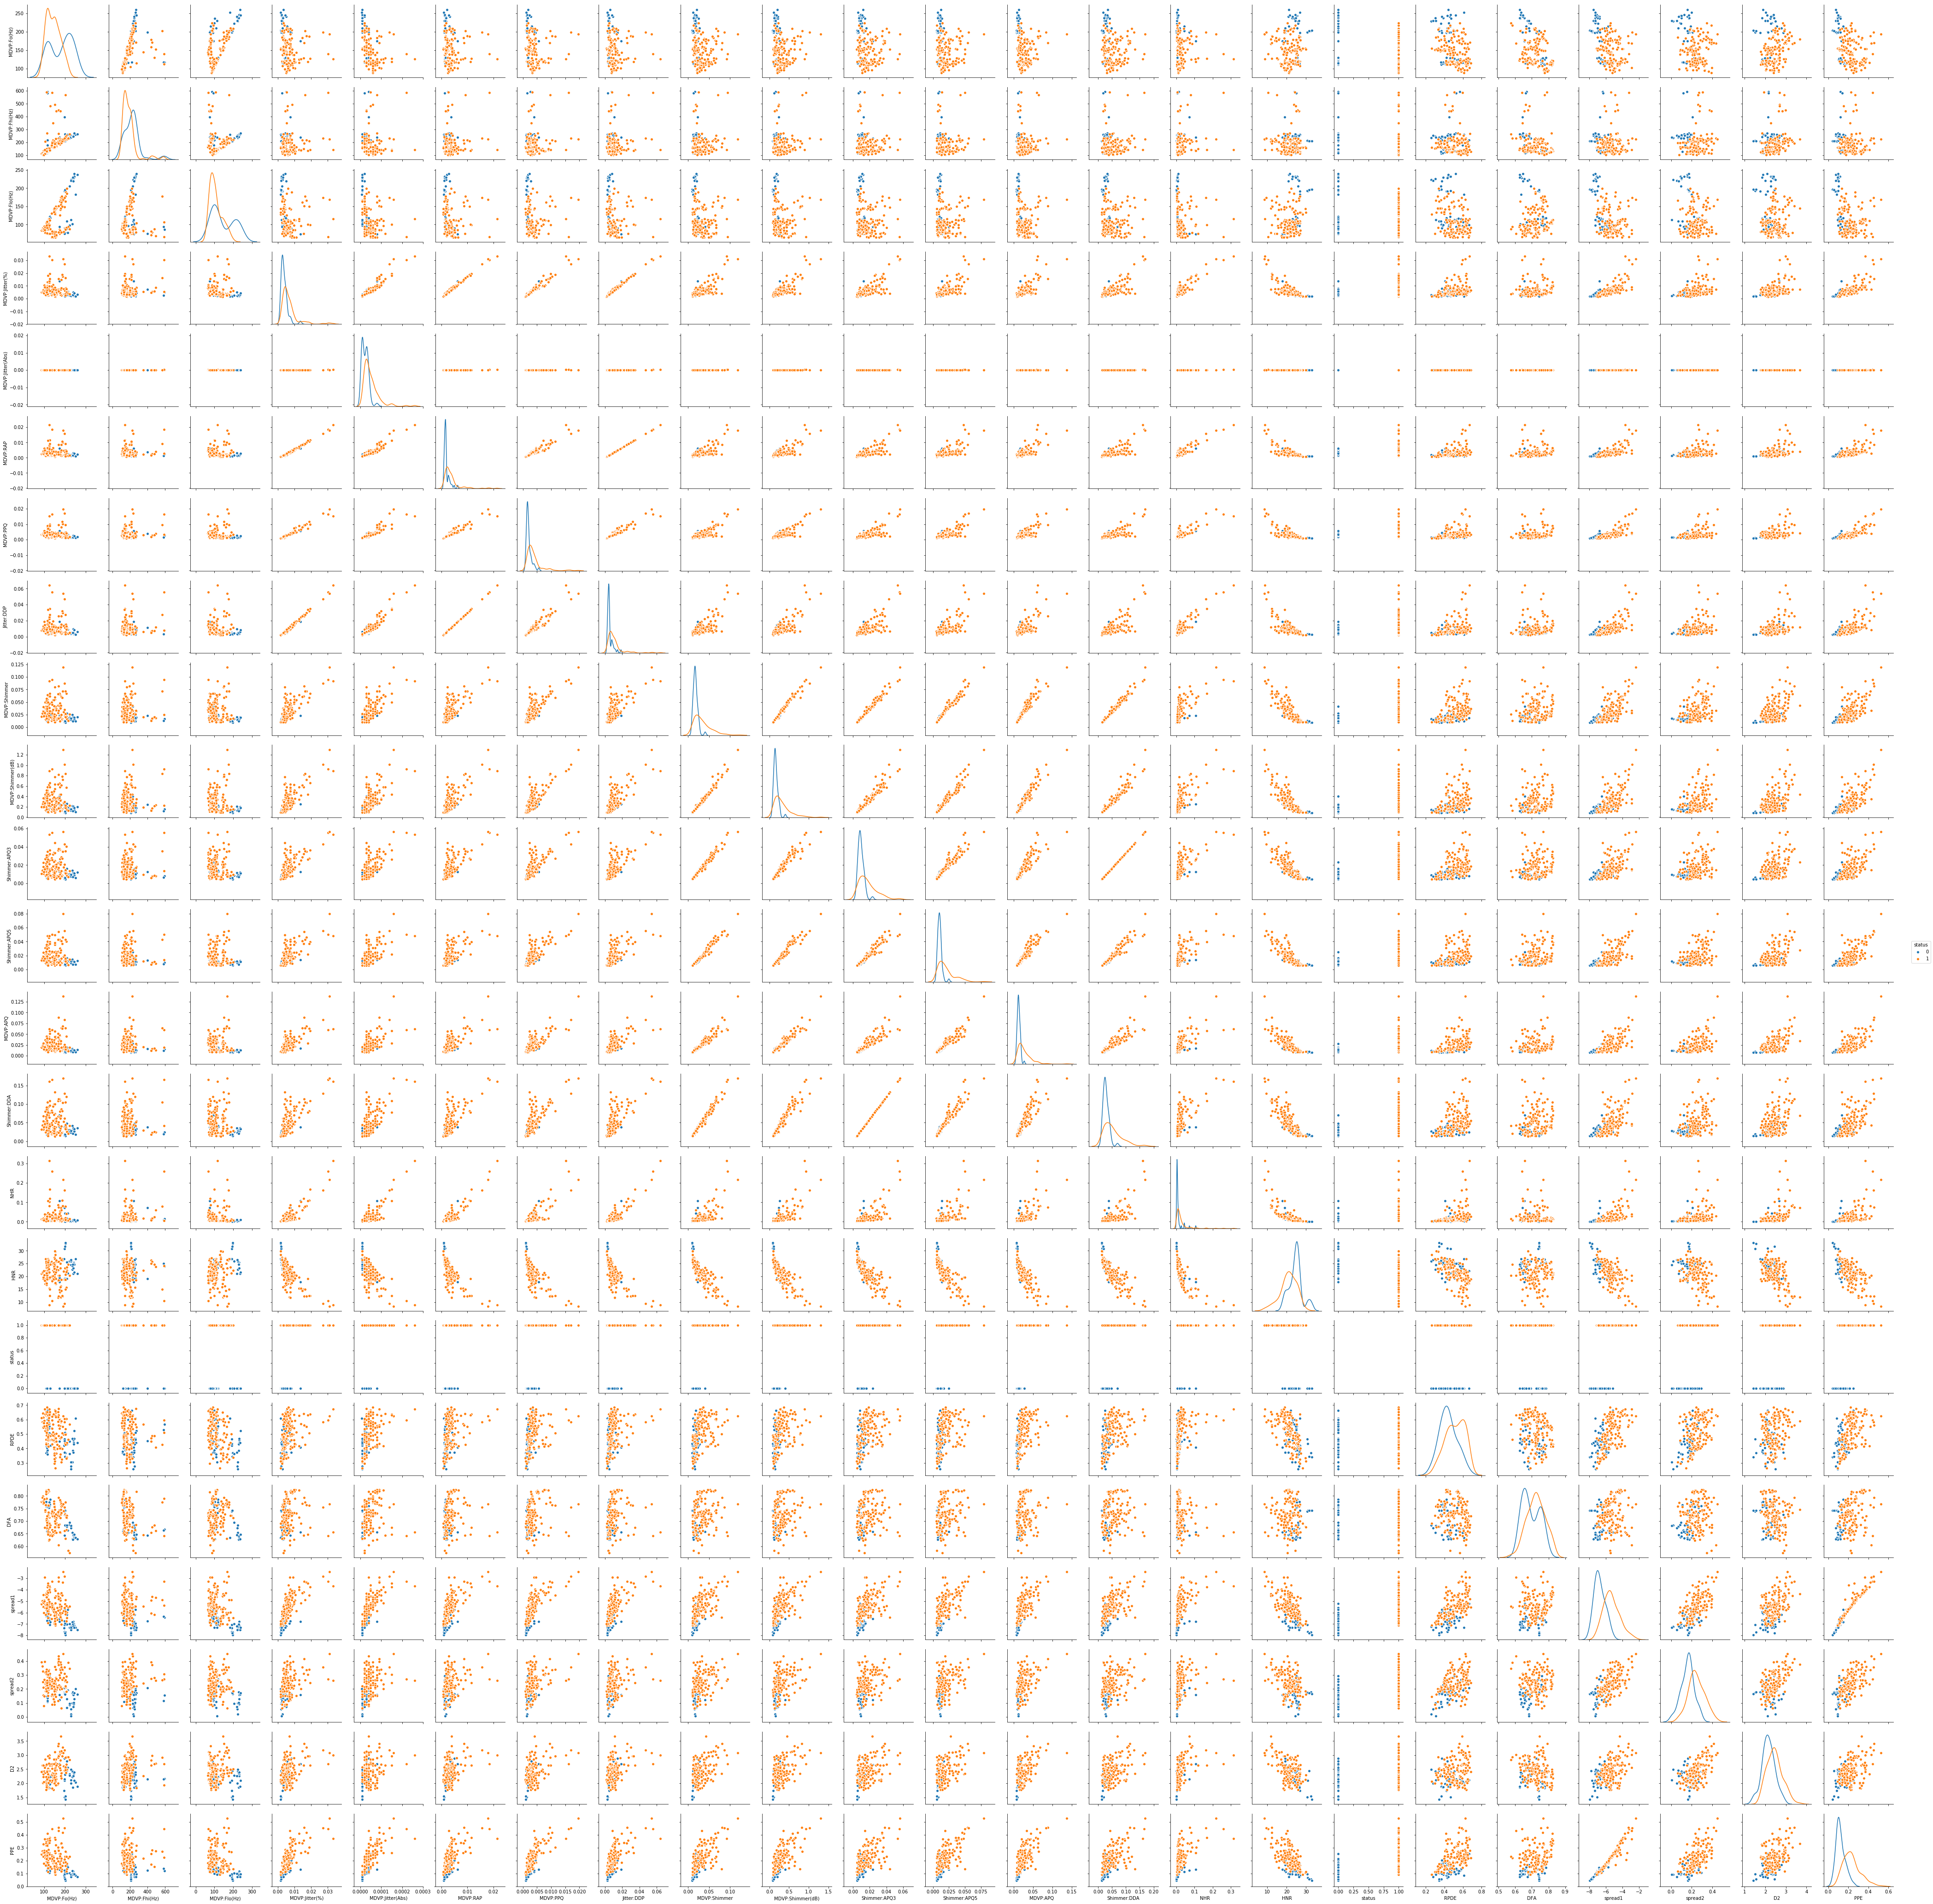

In [1717]:
import seaborn as sns
g =sns.pairplot(df,hue="status", diag_kind = 'kde')

In [1566]:
from pylab import  rcParams
rcParams['figure.figsize']=5,4

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]), <a list of 23 Text xticklabel objects>)

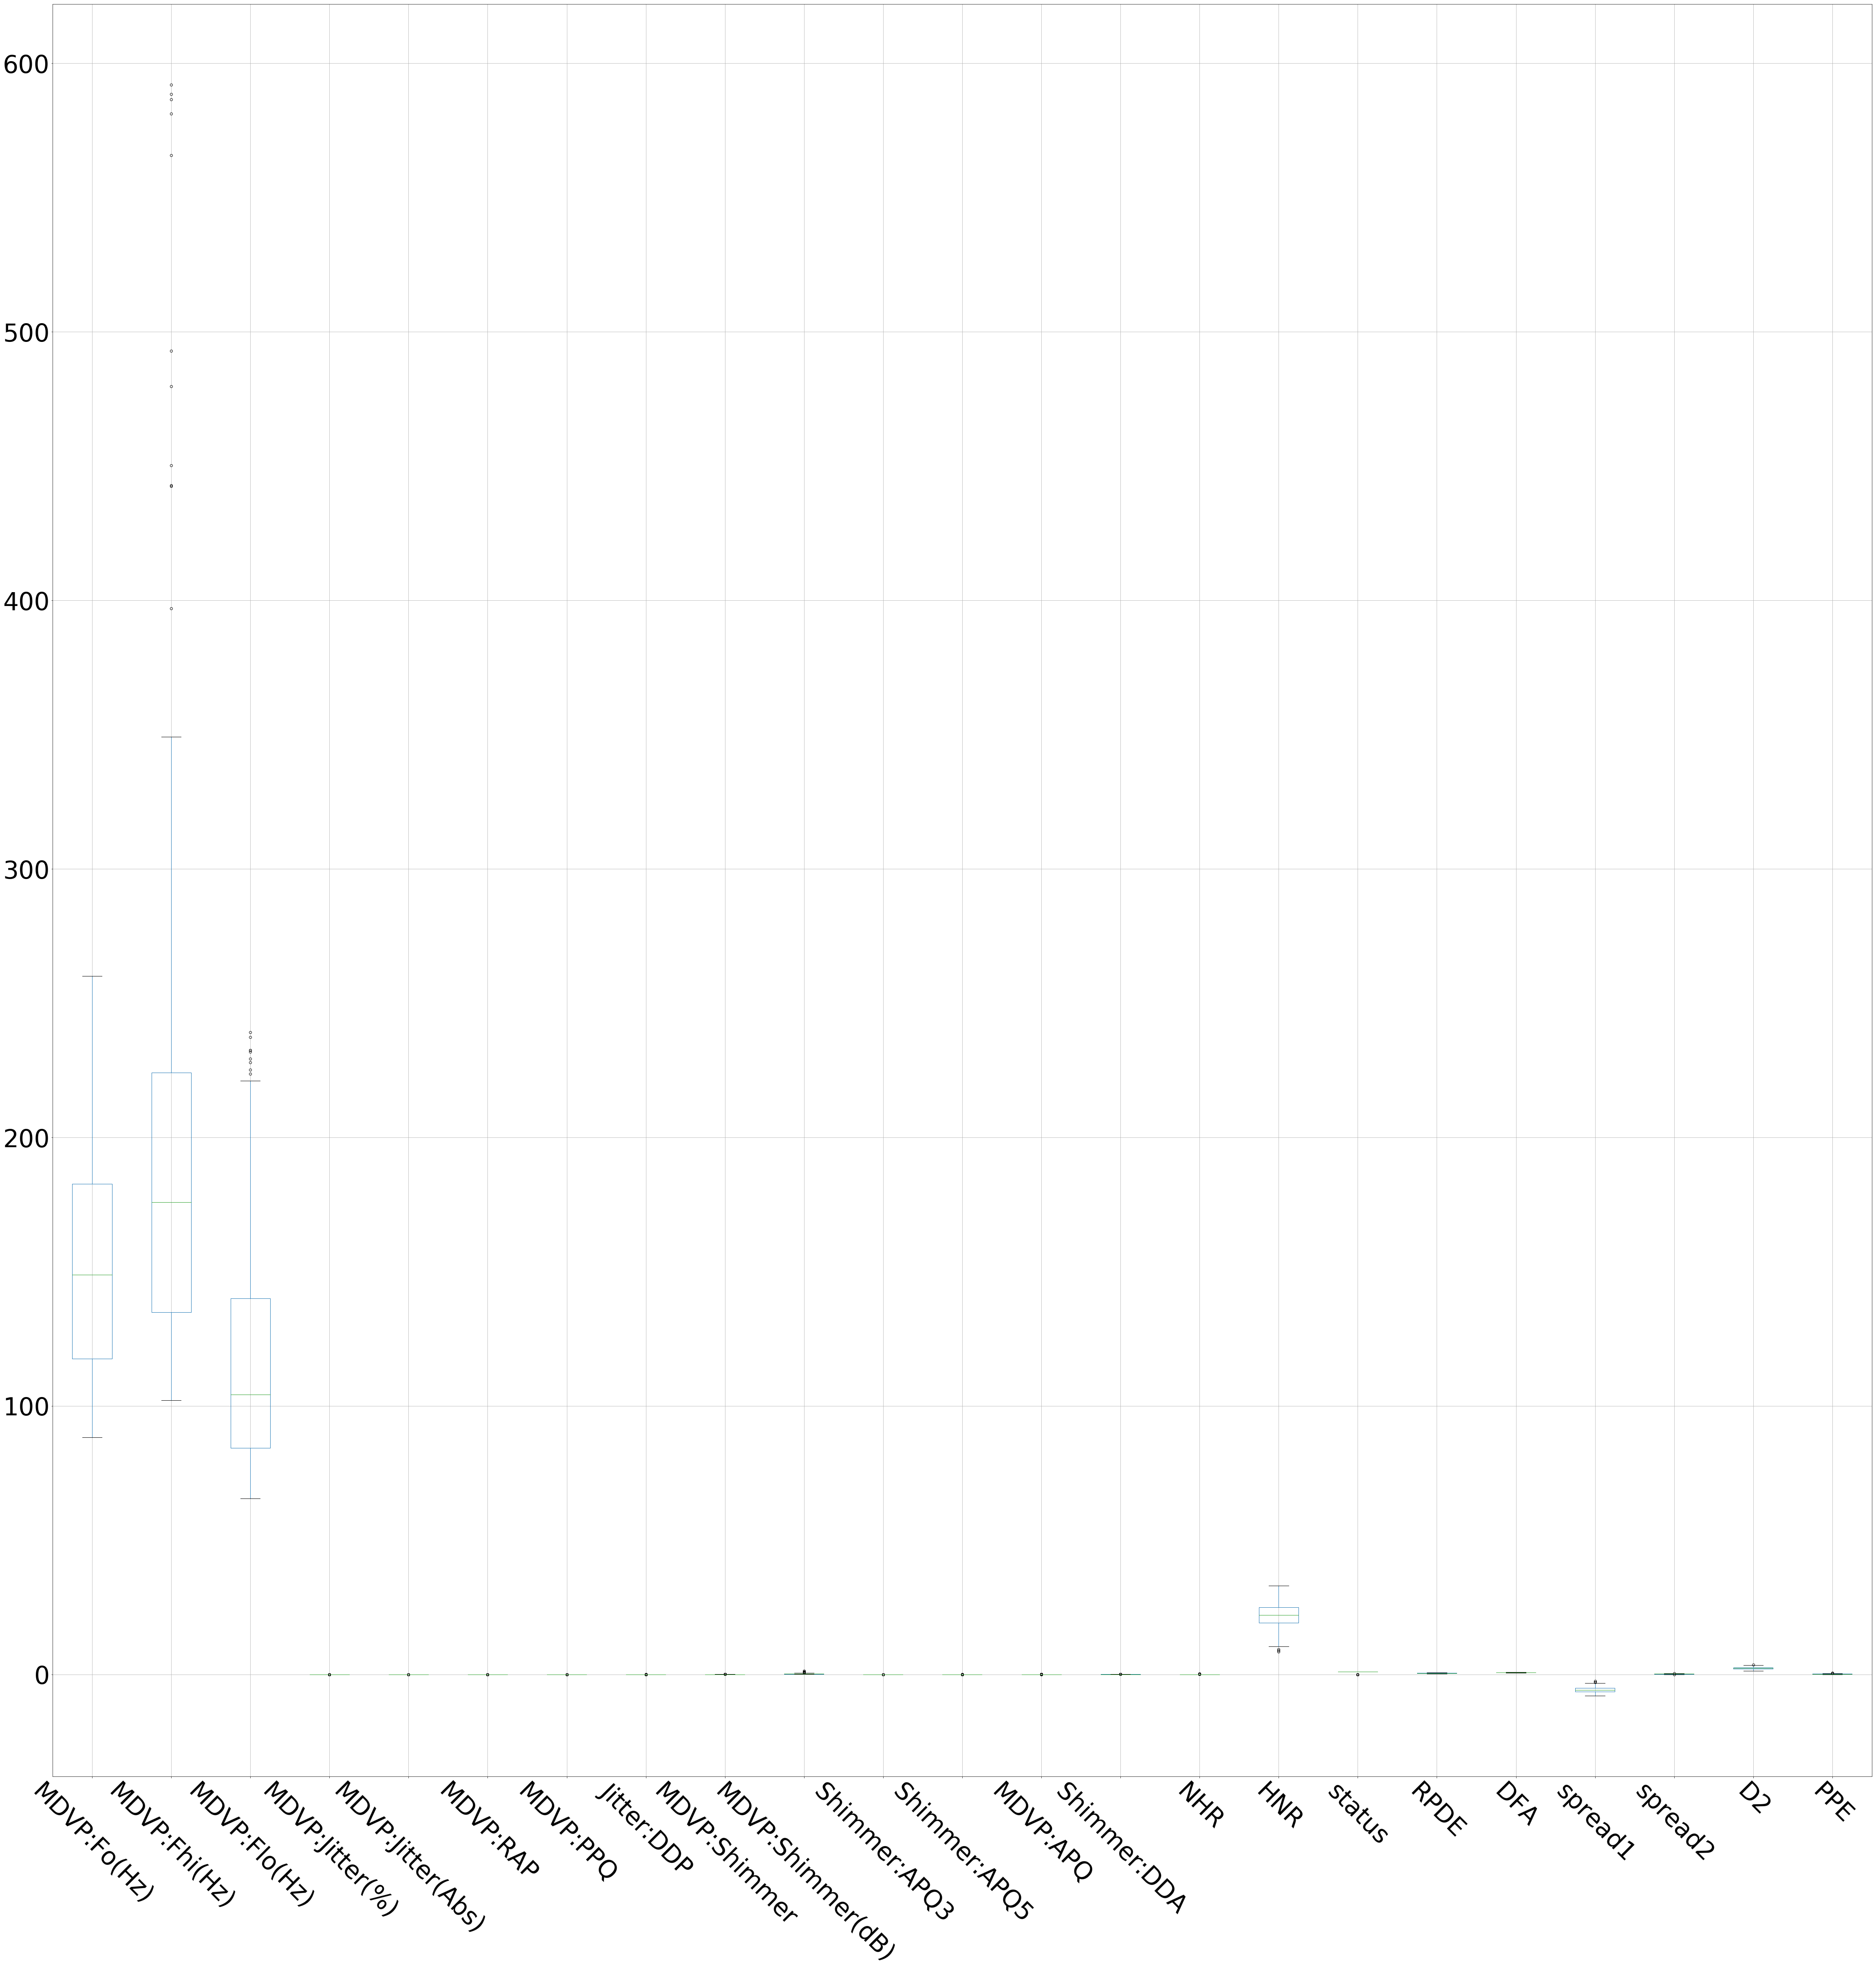

In [44]:
df.boxplot(return_type='dict', figsize=(80,80), fontsize=60)
plt.plot
plt.xticks(rotation=-45)
#ax = plt.subplots(figsize=(20, 10))

C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


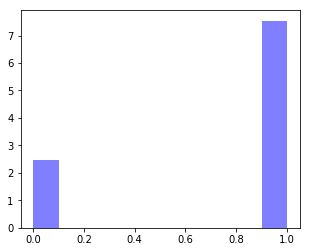

In [1712]:
num_bins = 10
plt.hist(df['status'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


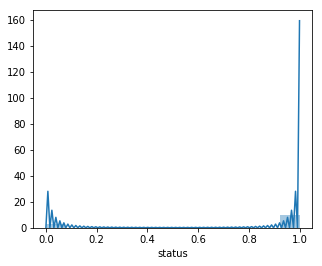

In [1716]:
sns.distplot(df.status)

In [1702]:
X.columns


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [1698]:
df.head(0)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [1568]:
df_new.head(0)

,MDVP:Fo(Hz),Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status


# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).


In [1570]:
from sklearn.cross_validation import train_test_split
X = df_new.iloc[:, 0:10].values
y = df_new.iloc[:, 10].values


#X = array[:,0:11] # select all rows and first 8 columns which are the attributes
#Y = array[:,11]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
#test_size = 0.30 # taking 70:30 training and test set
#seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [1693]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 6.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [1572]:
y_pred=dt_model.predict(X_test)

In [1573]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [1574]:
dt_model.feature_importances_

array([0.29082192, 0.13483332, 0.04446698, 0.        , 0.03587307,
       0.        , 0.17454008, 0.01969924, 0.        , 0.29976538])

In [1575]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9152542372881356

In [1576]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.73      0.81        15
          1       0.91      0.98      0.95        44

avg / total       0.92      0.92      0.91        59



In [1577]:
#creating a dataframe to capure the actual and predicted values for 22 variables
result = pd.DataFrame()
result['actual'] = y_test
result['predicted'] = y_pred

print(result['actual'].value_counts())
print('------******-----')
print(result['predicted'].value_counts())
ctab = pd.crosstab(y_test,y_pred)
ctab

1    44
0    15
Name: actual, dtype: int64
------******-----
1    47
0    12
Name: predicted, dtype: int64


col_0,0,1
row_0,,
0,11,4
1,1,43


# Using the Original Data set without removing any independent variables

In [1639]:
from sklearn.cross_validation import train_test_split
X_old = df.drop(columns=['status','name'])
y_old = df['status']


#X = array[:,0:11] # select all rows and first 8 columns which are the attributes
#Y = array[:,11]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 42  # Random numbmer seeding for reapeatability of the code
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, test_size=test_size, random_state=seed)

In [1640]:
print (X_test_old.shape)
print (X_train.shape)

(59, 22)
(136, 22)


In [1641]:
dt_model_old = DecisionTreeClassifier(criterion = 'entropy')
dt_model_old.fit(X_train_old, y_train_old)
y_pred_old=dt_model_old.predict(X_test_old)

In [1642]:
accuracy_score(y_test_old, y_pred_old)

0.8813559322033898

In [1643]:
print(classification_report(y_test_old, y_pred_old))

             precision    recall  f1-score   support

          0       0.83      0.67      0.74        15
          1       0.89      0.95      0.92        44

avg / total       0.88      0.88      0.88        59



In [1644]:
#creating a dataframe to capure the actual and predicted values for 22 variables
result = pd.DataFrame()
result['actual'] = y_test_old
result['predicted'] = y_pred_old

print(result['actual'].value_counts())
print('------******-----')
print(result['predicted'].value_counts())
ctab = pd.crosstab(y_test_old,y_pred_old)
ctab

1    44
0    15
Name: actual, dtype: int64
------******-----
1    47
0    12
Name: predicted, dtype: int64


col_0,0,1
status,,
0,10,5
1,2,42


# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 


In [1584]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=7,min_samples_leaf=8  )
dt_model.fit(X_train, y_train)
y_pred=dt_model.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test_old, y_pred_old))

accuracy: 0.8983050847457628 %
             precision    recall  f1-score   support

          0       0.67      0.83      0.74        12
          1       0.95      0.89      0.92        47

avg / total       0.90      0.88      0.89        59



# Ans : By Changing the max_depth and min_sample_leaf i was able to increase the model accuracy to 89%

# 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)


In [1664]:
from sklearn.cross_validation import train_test_split
X = df.drop(columns=['status','name'])
y = df['status']

test_size = 0.30 # taking 70:30 training and test set
seed = 42  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [1672]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,min_samples_leaf=1,max_features=3,max_depth=9)
rfcl = rfcl.fit(X_train, y_train)
y_pred=rfcl.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test_old, y_pred_old))

accuracy: 0.9491525423728814 %
             precision    recall  f1-score   support

          0       0.83      0.67      0.74        15
          1       0.89      0.95      0.92        44

avg / total       0.88      0.88      0.88        59



# Using 50 trees i was able to get an accuracy of 94%, and using the Gridsearchcv below we will be able to find out the best n_estimators

In [1684]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
n = np.arange(1,50,2)
depth = np.arange(1,7)
RF = RandomForestClassifier()
parameters = {'n_estimators' : n,
             'max_depth': depth}
GS = GridSearchCV(RF, parameters,scoring = 'accuracy', cv=4)

In [1685]:
GS.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]), 'max_depth': array([1, 2, 3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1686]:
print("The best param for the model::",GS.best_params_)
print("The best score for the model::",GS.best_score_)

The best param for the model:: {'max_depth': 6, 'n_estimators': 21}
The best score for the model:: 0.9338235294117647


In [1692]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=6,n_estimators = 21)
rfcl = rfcl.fit(X_train, y_train)
y_pred=rfcl.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test_old, y_pred_old))

accuracy: 0.9491525423728814 %
             precision    recall  f1-score   support

          0       0.83      0.67      0.74        15
          1       0.89      0.95      0.92        44

avg / total       0.88      0.88      0.88        59

